In [2]:
from dataset import prepare_dataset
from model import Autoencoder_original, Autoencoder_modified
from train import train_model, visualize_results

### Hypothese:
Die Verwendung von zu wenigen Neuronen in der Architektur eines Autoencoders beschränkt dessen Ausdrucksfähigkeit,
was dazu führt, dass unerwünschte schwarze Punkte auf den Zahlen auftreten.

### 0. Datensatz vorbereiten

In [4]:
train_loader, test_loader = prepare_dataset()

### 1. Das Problem reproduzieren
Es tritt unerwünschte schwarze Punkte auf den Zahlen auf.

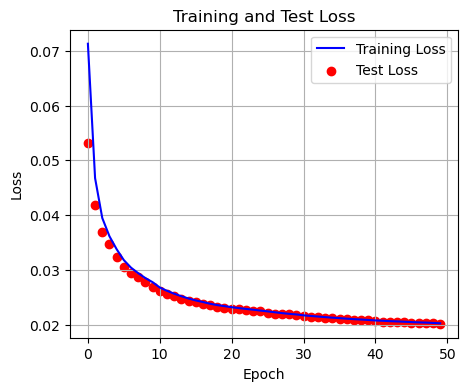

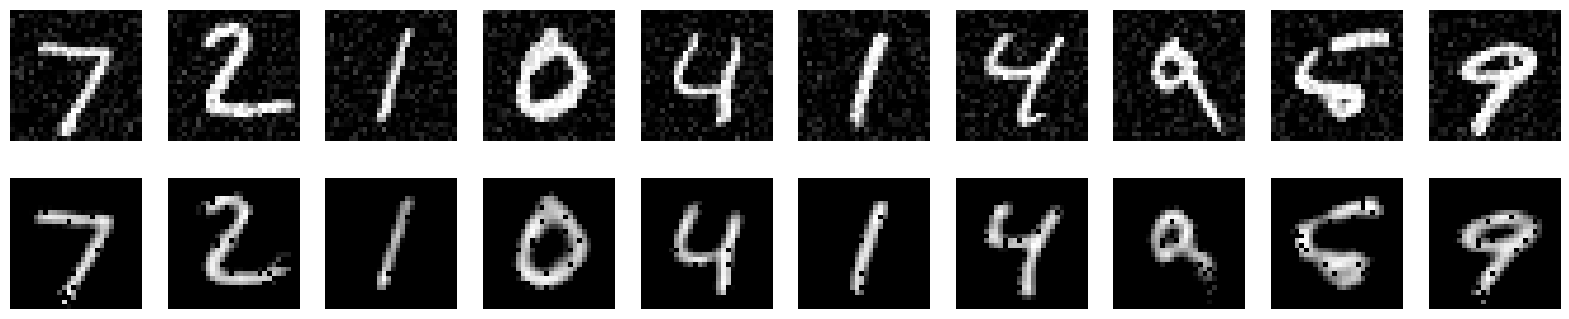

In [3]:
autoencoder_original = Autoencoder_original(engpass=32) 

train_model(autoencoder_original, train_loader, test_loader)

visualize_results(autoencoder_original, test_loader)

### 2. Versuchen, das Problem zu lösen, indem wir den "Engpass" erweitern.
Es gibt immer noch schwarze Punkte auf den Zahlen.
Beschränkte Ausdrucksfähigkeit ist wahrscheinlich nicht die Ursache des Problems.

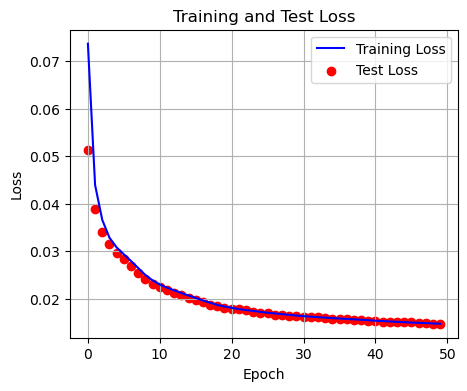

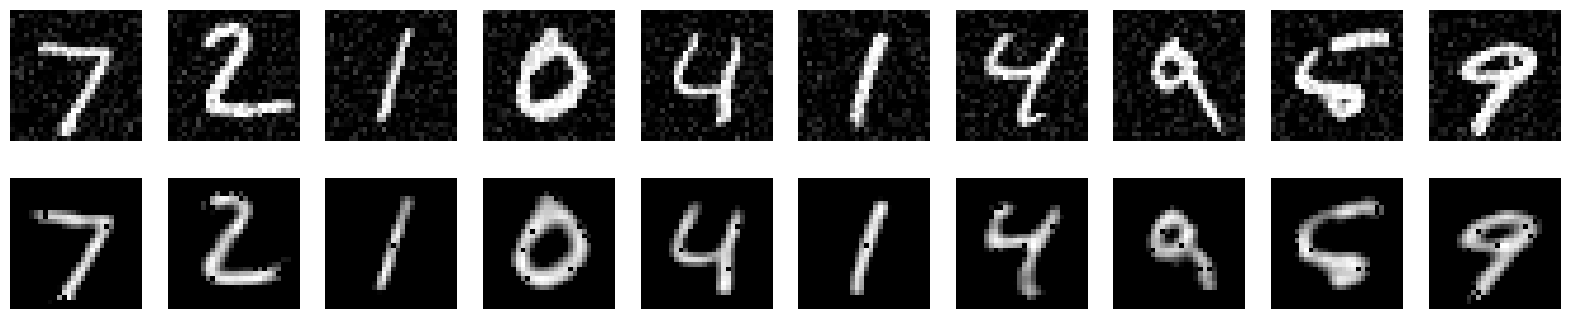

In [4]:
autoencoder_original = Autoencoder_original(engpass=64) 

train_model(autoencoder_original, train_loader, test_loader)

visualize_results(autoencoder_original, test_loader)

### 3. Versuchen, das Problem zu lösen, indem wir die verwendeten Aktivierungsfunktionen verändern.
Die schwarzen Punkte werden eliminiert.
Das Problem liegt an der Aktivierungsfunktion Relu:

- Der Datensatz wurde zu [0, 1] normalisiert.
- Die zur Visualisierung verwendete Funktion plt.imshow() akzeptiert einen Wertbereich [0, 1]. 
- 0 ist schwarz, 1 ist weiß.
- In der Ausgabeschicht vom Decoder wurden die Werte einiger Pixel von Relu "ausgeschaltet".
- D.h. die Werte einiger Pixel wurden auf 0 gesetzt, und diese Pixel wurden schwarz visualisiert.

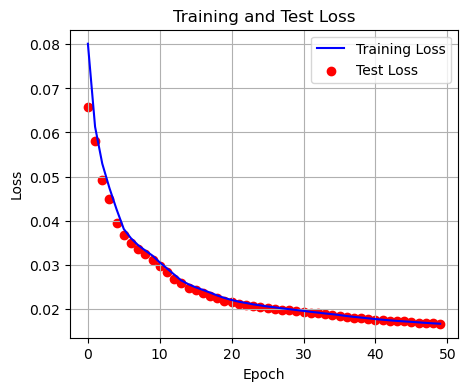

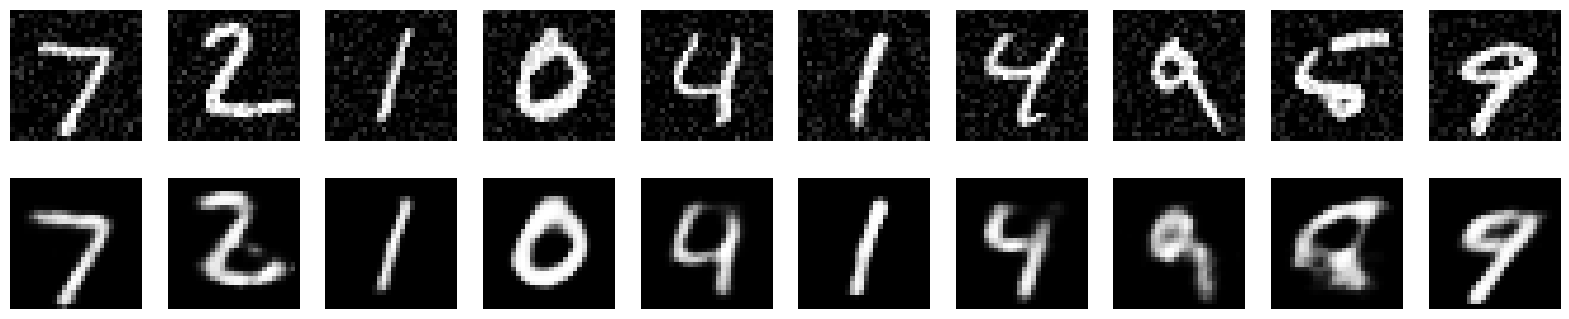

In [5]:
autoencoder_modified_32 = Autoencoder_modified(engpass=32) 

train_model(autoencoder_modified_32, train_loader, test_loader)

visualize_results(autoencoder_modified_32, test_loader)

### 4. Beschränkt der "Engpass" wirklich die Ausdrucksfähigkeit des Autoencoders?

#### 4.1 Modell mit (etwas) breiterem Engpass
ermöglicht stärkere Ausdrucksfähigkeit

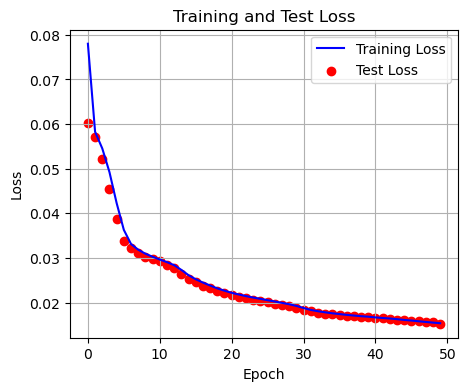

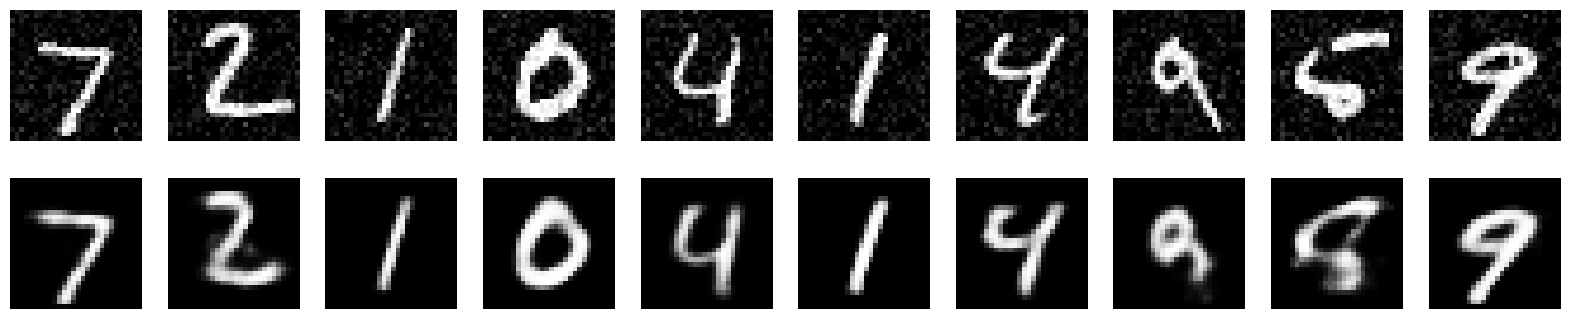

In [7]:
autoencoder_modified_64 = Autoencoder_modified(engpass=64) 

train_model(autoencoder_modified_64, train_loader, test_loader)

visualize_results(autoencoder_modified_64, test_loader)

#### 4.2 Modell mit engerem Engpass
führt zu schwächerer Ausdrucksfähigkeit

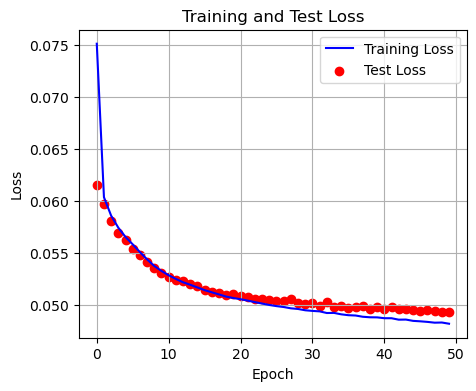

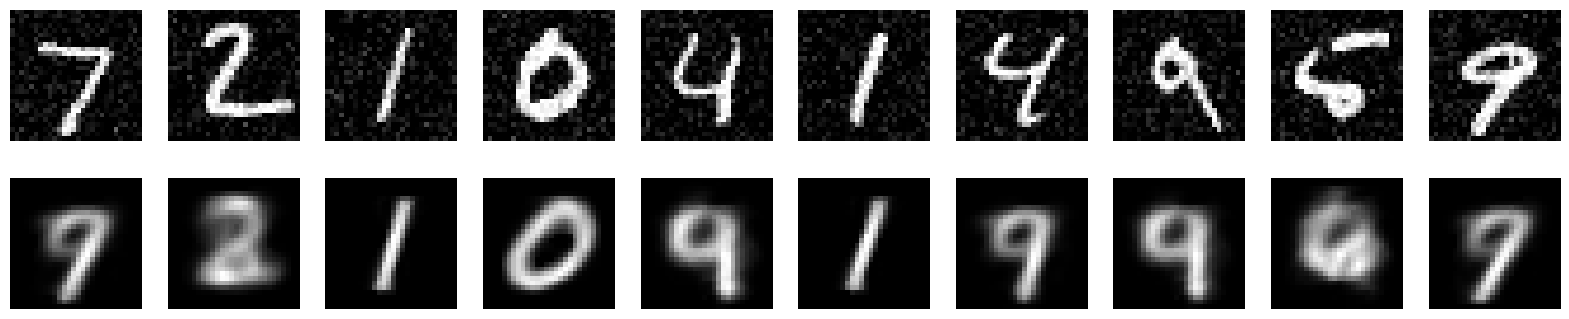

In [5]:
autoencoder_modified_32 = Autoencoder_modified(engpass=1) 

train_model(autoencoder_modified_32, train_loader, test_loader)

visualize_results(autoencoder_modified_32, test_loader)

### Schlussfolgerung:
Die Anzahl der Neuronen in der Ausgabeschicht vom Encoder ("Engpass") 
- beschränkt die Ausdrucksfähigkeit eines Autoencoders, 
- ist jedoch keine Ursache der unerwünschten schwarzen Punkte.